# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

This project uses housing data from San Fransisco. The data includes info about the houses such as the Living area, Lot area, Listing age, Bedrooms, Bathrooms, Price cut amount, Property price, Property type, and Lot/land area for the house. This project aims to use multiple machine leanring models such as Gradient Boosting Regressor and Random Forest Regressor to predict the price of a hosue based on the attributes listed above. The performance measure that will be used is RMSE (Root Mean Square Error).

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

1. I first searched up San Fransisco housing data on Google and I decided that I wanted to get the data from Zillow.
2. I used a chrome extension called Zillow Data Exporter that exported all the housing data from the current page into a csv file (aprox. 42 houses per page).
3. I repeated step 2 over 20 times in order to get an adequent amount of data.
4. Finallly, I merged all the csv files together. 

In [1]:
#import necessary libraries
import pandas as pd
from pathlib import Path
import numpy as np

#read the csv file called housing_data from my data folder
sf_housing_data = pd.read_csv(Path("data/housing_data.csv"))

#counts the number of Bedrooms from the housing data
sf_housing_data["Bedrooms"].value_counts()


Bedrooms
2.0     242
3.0     209
4.0     132
1.0     116
5.0      56
6.0      30
0.0      15
8.0      13
7.0      10
10.0      2
9.0       2
18.0      1
12.0      1
Name: count, dtype: int64

In the above, I see that the average number of bedrooms per house is around 2-3 bedrooms. This indicates that the houses/condos/apartements in San Fransisco are typically on the smaller side. 

In [2]:
#displays info related to the columns such as the datatype and the count of non empty values
sf_housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        871 non-null    int64  
 1   Row Number                        871 non-null    int64  
 2   Property URL                      871 non-null    object 
 3   MLS ID                            0 non-null      float64
 4   Listing description               871 non-null    object 
 5   Property type                     871 non-null    object 
 6   Number of days on Zillow          871 non-null    int64  
 7   Property price (USD)              871 non-null    int64  
 8   Price was cut                     871 non-null    object 
 9   Price cut amount (USD)            176 non-null    float64
 10  Price cut date (MM/DD/YYYY)       176 non-null    object 
 11  Living area                       809 non-null    float64
 12  Living a

In the above, I can see that there are a lot of attributes that are non numeric. This indicates that I must use Ordinal Encoder or get_dummies to transform the objects to become numeric so it's easier for the computer to analyze. I can see that there are 11 objects, 5 integers, and 7 floats. In the above I can also see the specific column names for the corresponding data type which is helpful. I can also see that there is some missing data for Living area, Living area unit, Price per living area (USD), Bedrooms, Lot/land area, Lot/land area unit, and Bathrooms. However, there is a lot of missing data for Price cut amount (USD), and Price cut date.  

In [3]:
#prints out the names of the columns
print(sf_housing_data.columns.tolist())


['Unnamed: 0', 'Row Number', 'Property URL', 'MLS ID', 'Listing description', 'Property type', 'Number of days on Zillow', 'Property price (USD)', 'Price was cut', 'Price cut amount (USD)', 'Price cut date (MM/DD/YYYY)', 'Living area', 'Living area unit', 'Price per living area unit (USD)', 'Lot/land area', 'Lot/land area unit', 'Bedrooms', 'Bathrooms', 'Street address', 'City', 'Zip', 'State', 'Country']


In [4]:
#displays the number of houses that have a specific propety price from the housing data
sf_housing_data["Property price (USD)"].value_counts()

Property price (USD)
1495000    19
1195000    15
799000     15
1295000    13
1995000    13
           ..
398500      1
1160000     1
619999      1
6995000     1
5250000     1
Name: count, Length: 430, dtype: int64

In the above, I see that house prices vary accross a large scale but the majority of the houses are over 1 million dollars. This can indicate that the living area in San Fransisco is expensive. 

In [5]:
#displays the number of bathrooms from the housing data
sf_housing_data["Bathrooms"].value_counts()

Bathrooms
2.0     281
1.0     206
3.0     165
4.0      92
0.0      47
5.0      35
6.0      18
7.0       9
8.0       7
9.0       3
10.0      1
12.0      1
Name: count, dtype: int64

In the above, I can see that there there is a large number of houses/aprtements in San Fransisco that have 1-2 bathrooms. This can indicate that the majority of the houses in San Fransisco are on the smaller side.  

In [6]:
#displays info such as mean, std, min, 50%, max related to the housing data so it's easier to get a grasp of the data distribution
sf_housing_data.describe()


,Unnamed: 0,Row Number,MLS ID,Number of days on Zillow,Property price (USD),Price cut amount (USD),Living area,Price per living area unit (USD),Lot/land area,Bedrooms,Bathrooms,Zip
count,871.000000,871.000000,0.0,871.000000,8.710000e+02,1.760000e+02,809.000000,809.000000,845.000000,829.000000,865.000000,871.000000
mean,765.174512,436.000000,NaN,52.442021,2.187008e+06,2.173386e+05,2495.166873,946.259617,2647.518580,2.963812,2.406936,94115.265212
std,439.006720,251.580338,NaN,94.174434,2.942064e+06,5.533383e+05,3318.226552,438.526736,2123.168891,1.712033,1.586531,13.536147
min,0.000000,1.000000,NaN,0.000000,2.500000e+04,5.000000e+02,258.000000,72.980000,0.000000,0.000000,0.000000,94014.000000
25%,518.000000,218.500000,NaN,6.000000,9.075000e+05,3.113700e+04,1109.000000,688.460000,1463.620000,2.000000,1.000000,94109.000000
50%,781.000000,436.000000,NaN,13.000000,1.399000e+06,7.000000e+04,1640.000000,893.550000,2500.340000,3.000000,2.000000,94114.000000
75%,998.500000,653.500000,NaN,59.000000,2.225000e+06,1.516660e+05,2675.000000,1123.750000,3360.000000,4.000000,3.000000,94122.000000
max,1911.000000,871.000000,NaN,785.000000,3.800000e+07,6.000000e+06,57448.000000,5087.720000,10856.000000,18.000000,12.000000,94158.000000


In [7]:
#prints out all the column names in the housing data that are objects
object_columns = sf_housing_data.select_dtypes(include='object').columns
print(object_columns)

#prints out all the column names in the housing data that are numbers
numeric_columns = sf_housing_data.select_dtypes(include=np.number).columns
print(numeric_columns)


Index(['Property URL', 'Listing description', 'Property type', 'Price was cut',
       'Price cut date (MM/DD/YYYY)', 'Living area unit', 'Lot/land area unit',
       'Street address', 'City', 'State', 'Country'],
      dtype='object')
Index(['Unnamed: 0', 'Row Number', 'MLS ID', 'Number of days on Zillow',
       'Property price (USD)', 'Price cut amount (USD)', 'Living area',
       'Price per living area unit (USD)', 'Lot/land area', 'Bedrooms',
       'Bathrooms', 'Zip'],
      dtype='object')


In the above, I can see the attributes that are objects and the attributes that are numeric. This will help me in the future when I use OrifinalEncoder to change the object columns to numeric

In [8]:
#displays the number of bathrooms in the housing data
sf_housing_data["Bathrooms"].value_counts()

Bathrooms
2.0     281
1.0     206
3.0     165
4.0      92
0.0      47
5.0      35
6.0      18
7.0       9
8.0       7
9.0       3
10.0      1
12.0      1
Name: count, dtype: int64

In [9]:
#displays the number of values for living area unit for the housing data 
sf_housing_data["Living area unit"].value_counts()

Living area unit
sqft    809
Name: count, dtype: int64

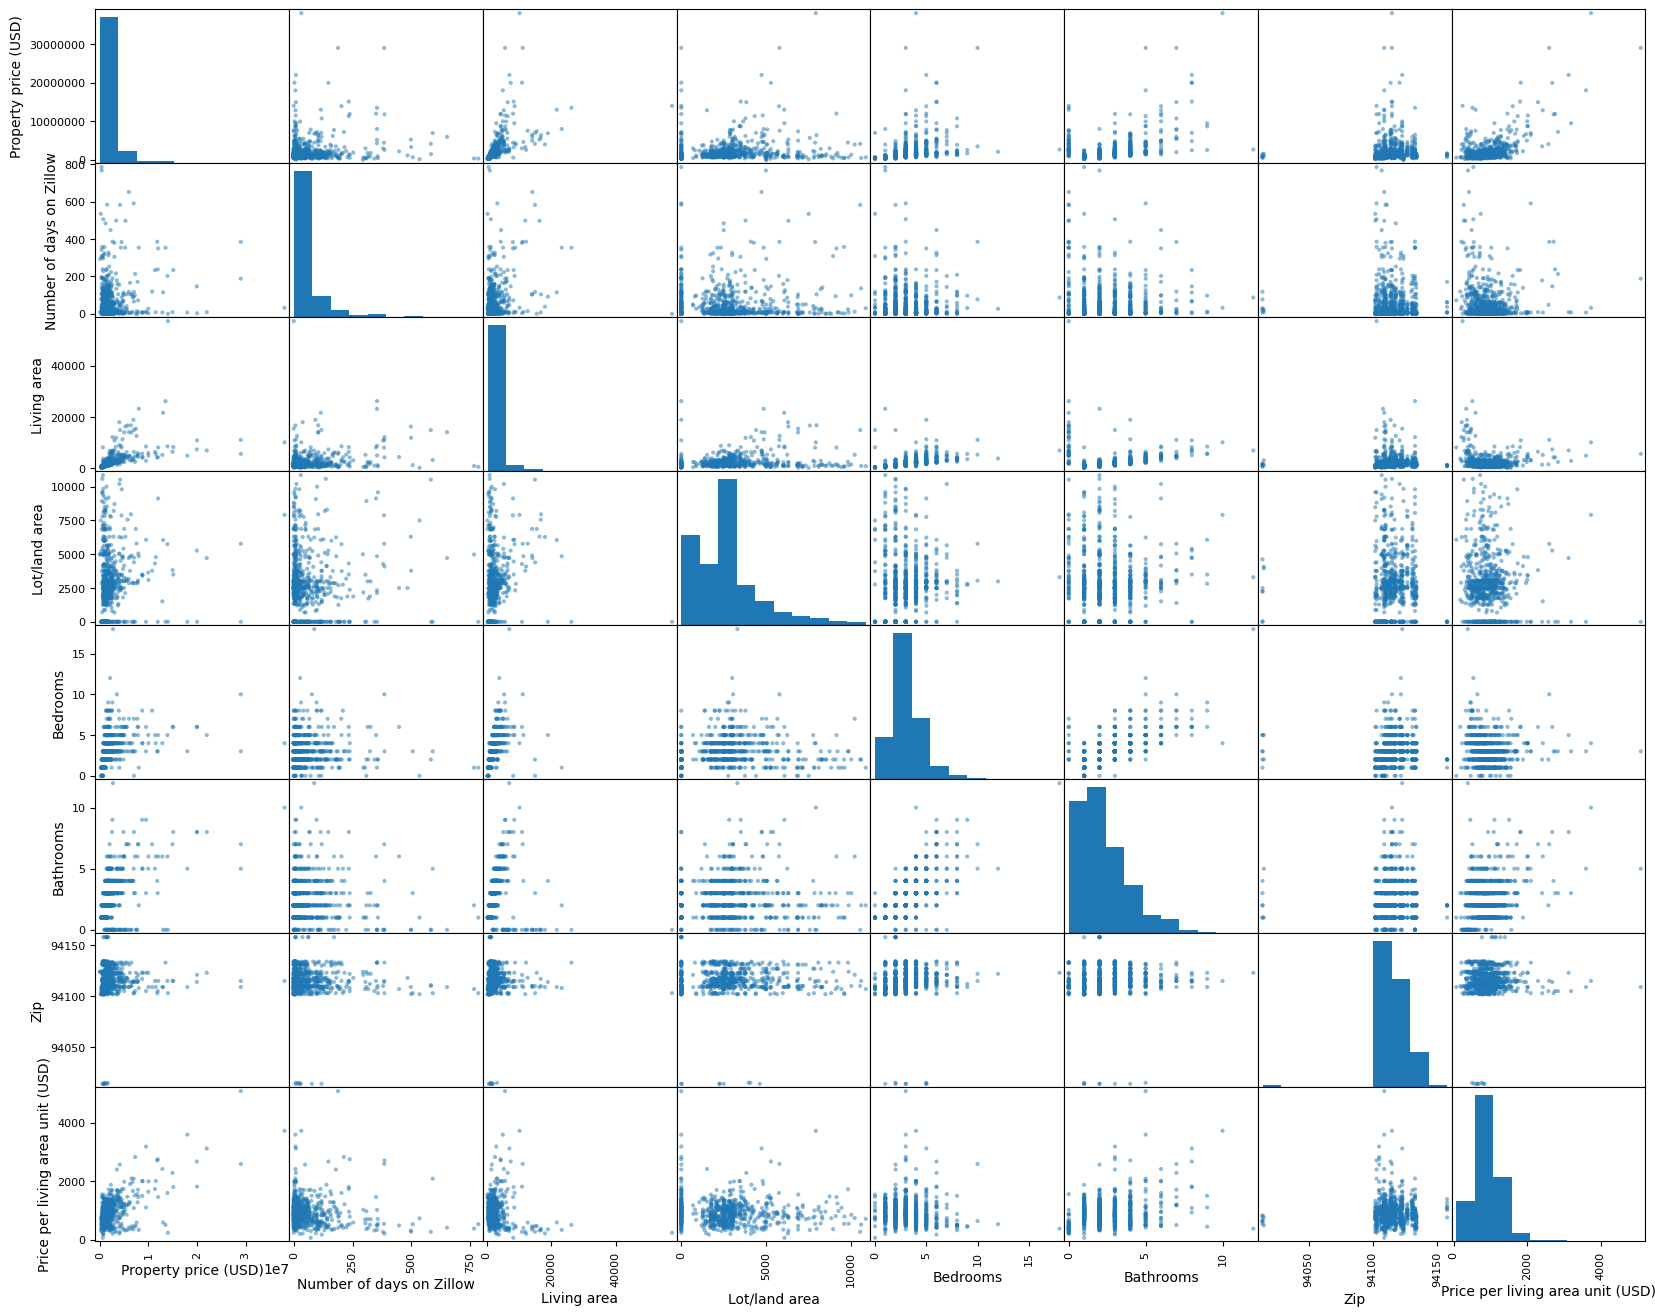

In [10]:
#import library to display the graph
from matplotlib import pyplot as plt
#import library to display the scatter matrix
from pandas.plotting import scatter_matrix

#creates tehe scatter matrix with the attributes below 
attributes = ["Property price (USD)", "Number of days on Zillow", "Living area", "Lot/land area", "Bedrooms", "Bathrooms", "Zip", "Price per living area unit (USD)"]

#displays the scatter matrix with the attributes and specifies the size of the scatter matrix 
scatter_matrix(sf_housing_data[attributes], figsize=(20,16))
plt.show()

In the above, I see some positive correlation between Property Price and variables like Living area, Lot/land area, Bedrooms, and Bathrooms. This is expected because larger or more luxerious homes tend to be more expensive. 

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Row Number'}>,
        <Axes: title={'center': 'MLS ID'}>],
       [<Axes: title={'center': 'Number of days on Zillow'}>,
        <Axes: title={'center': 'Property price (USD)'}>,
        <Axes: title={'center': 'Price cut amount (USD)'}>],
       [<Axes: title={'center': 'Living area'}>,
        <Axes: title={'center': 'Price per living area unit (USD)'}>,
        <Axes: title={'center': 'Lot/land area'}>],
       [<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Zip'}>]], dtype=object)

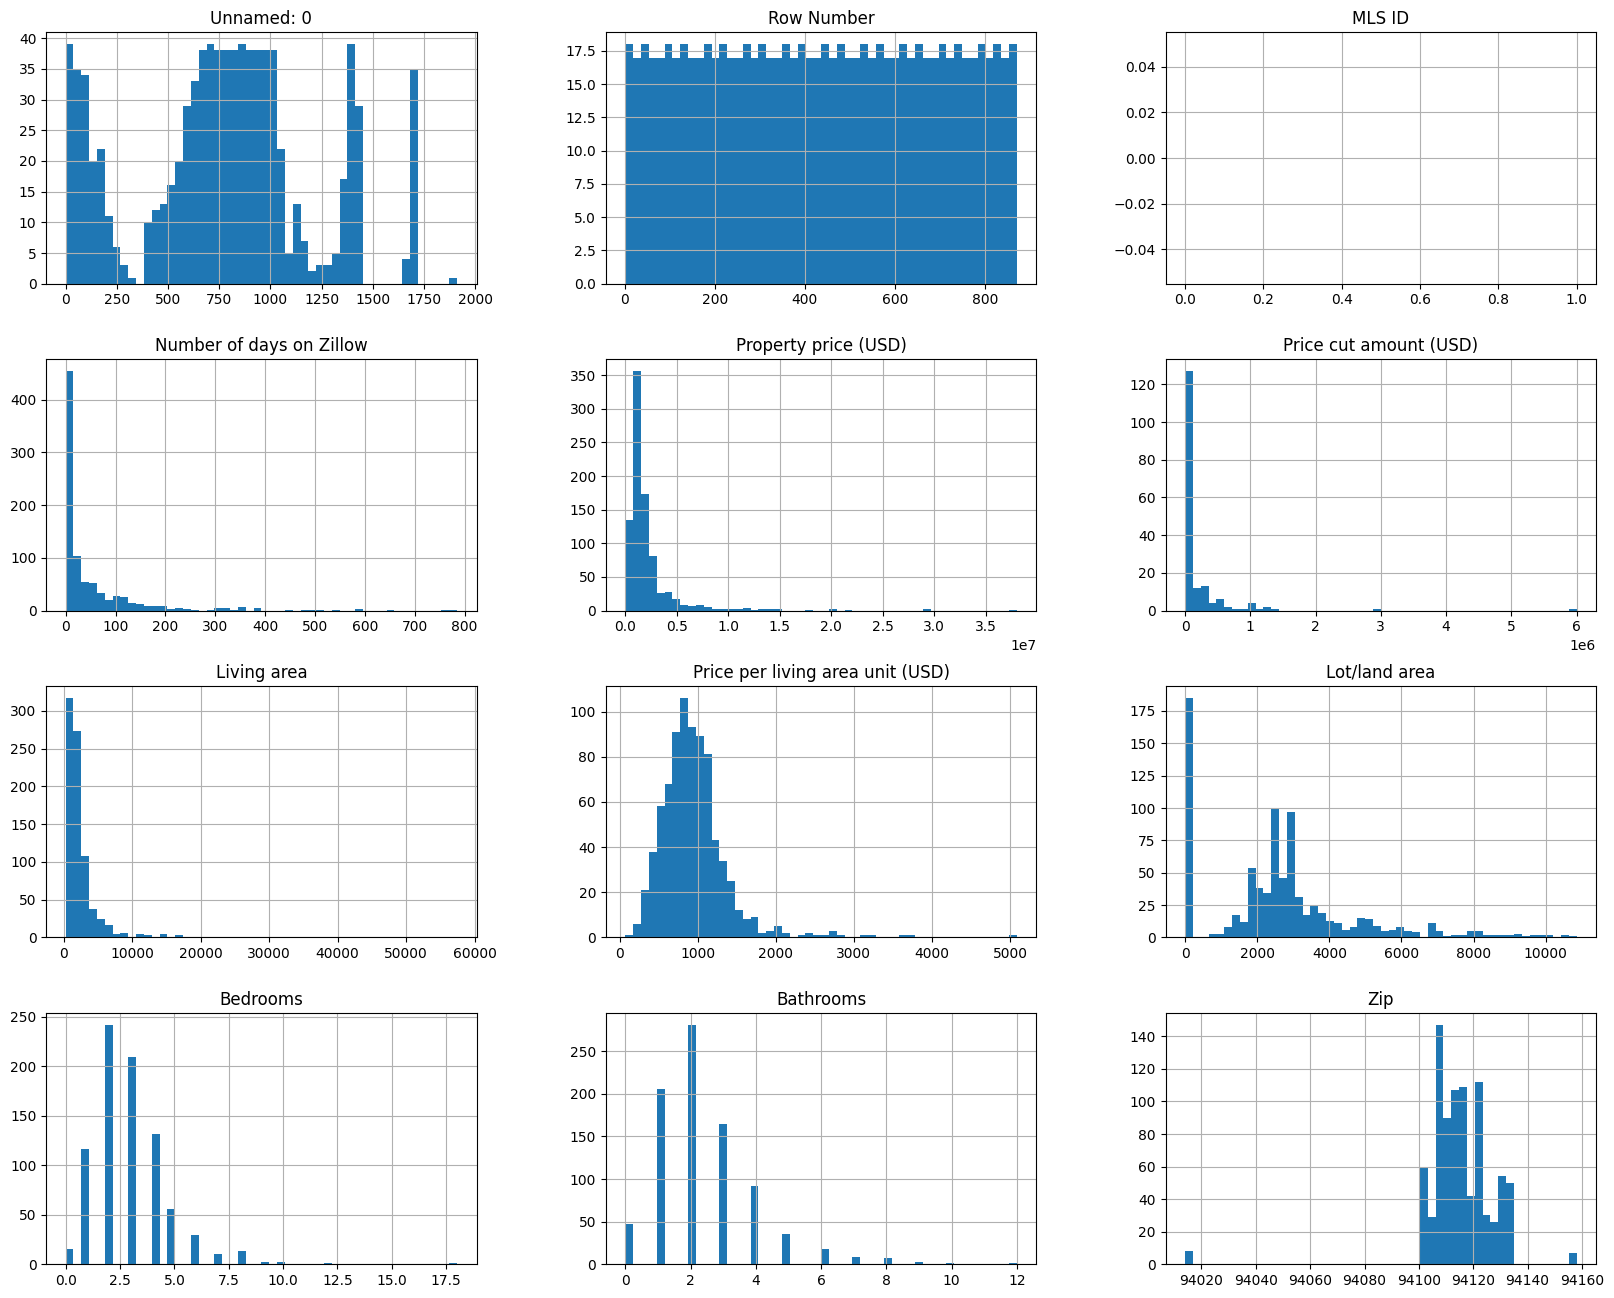

In [11]:
#displays a histogram of the attributes for the housing data
sf_housing_data.hist(bins=50,figsize=(20,16))

In the above I can see that the majority of the houses in San Fransisco are around 1-2 million dollars. There is a right skew in the data in which there are some houses 10-20 million dollars but the majority of the houses are between 1-2 million dollars. There is also a right skew in the living area, the price per living area, and price cut amount. This indicates that there are some instances of houses that don't follow the general trend of the majority of the data. I can also see that the bedrooms and bathrooms data is more symmetrical compared to the other histograms which could suggest that many of the houses had a similar amount of bedrooms/bathrooms and there are less outliers and less data that don't follow the general pattern. 

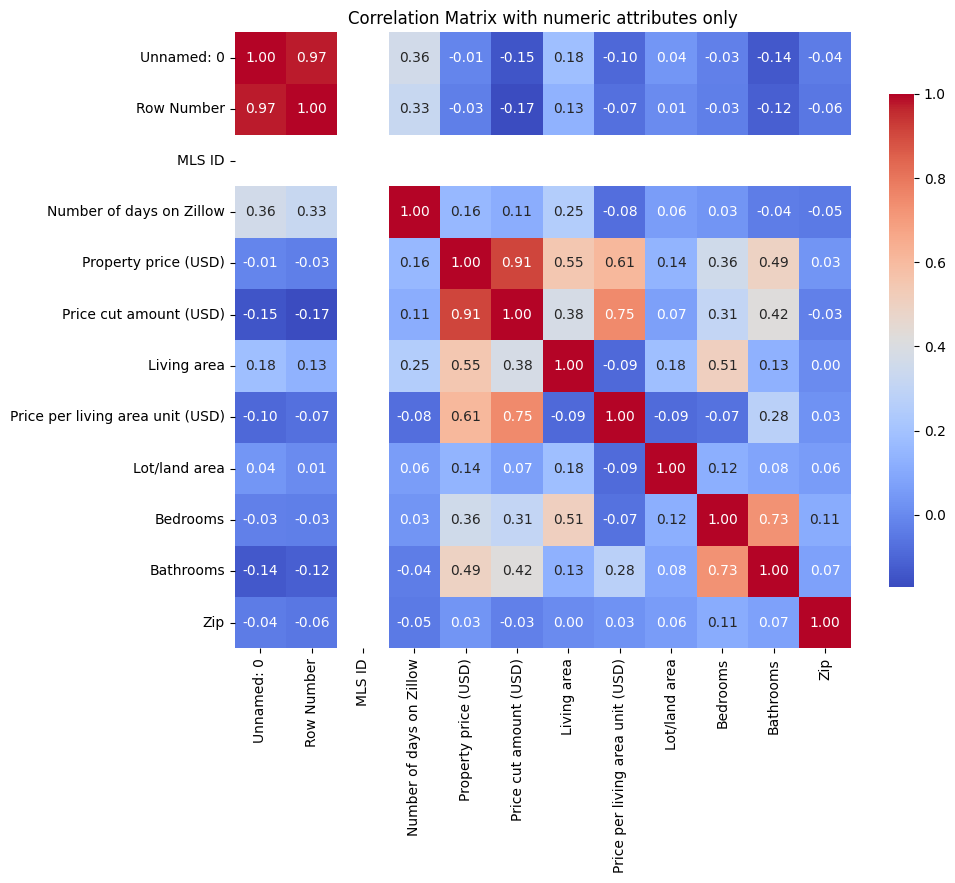

In [12]:
#import necessary library to create the correlation matrix
import seaborn as sns

#creates correlation matri with only the numeric attributes
correlation_matrix = sf_housing_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

#displays the corelation matrix and title
plt.title('Correlation Matrix with numeric attributes only')
plt.show()



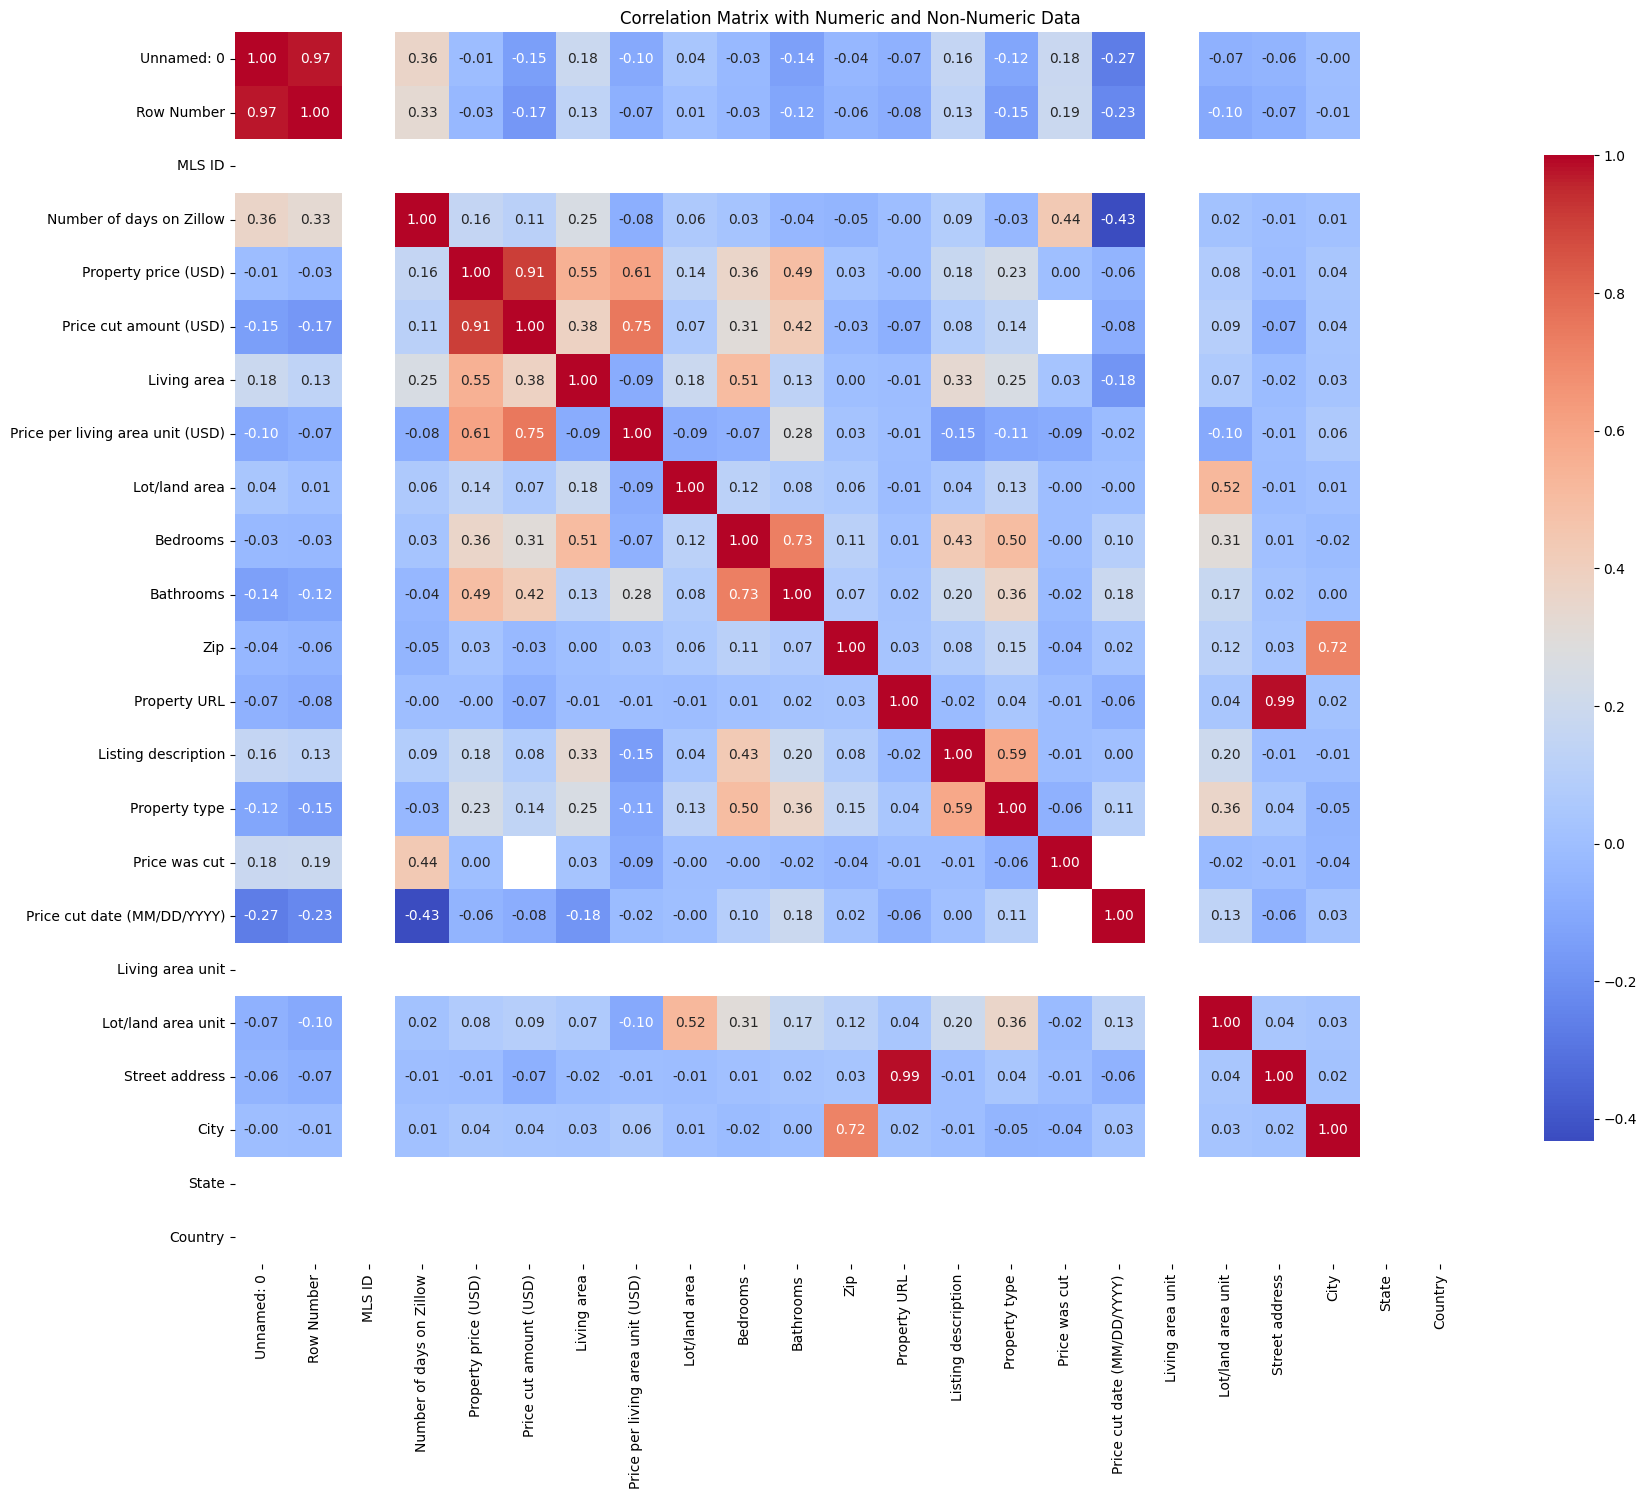

In [13]:
#import necessary library to change the non numeric attributes to become numeric
from sklearn.preprocessing import OrdinalEncoder


numeric_data = sf_housing_data.select_dtypes(include='number')
non_numeric_data = sf_housing_data.select_dtypes(exclude='number')

#changes the non numeric data to become numeric using OridinalEncoder
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(non_numeric_data)
encoded_df = pd.DataFrame(encoded_data, columns=non_numeric_data.columns)

#combines the numeric and the changed data
combined_data = pd.concat([numeric_data, encoded_df], axis=1)

#uses the corr() function to create a correlation matrix
correlation_matrix = combined_data.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

#displays the correlation matrix for the numeric and the non numeric attributes
plt.title('Correlation Matrix with Numeric and Non-Numeric Data')
plt.show()


In the above, I printed the correlation matrix for all the numeric values. I can see that property price has a strong positive correlation with Price cut amount suggesting that higher priced properties tend to have larger price cuts. Property price also moderately correlates with Price per living area unit, Bathrooms, and Bedrooms, indicating that higher property prices are typically associated with larger and more luxerious properties. 

Price cut amount shows a high correlation with Price per living area unit and a moderate correlation with Bathrooms, implying that properties with a price cut are often larger or more expensive per square unit. 

Bedrooms and Bathrooms are highly correlated, which is expected as homes with more bedrooms typically have more bathrooms. 

Lot/land area has relatively weak correlations with most other variables, except for a small positive relationship with Bedrooms and Bathrooms, suggesting that properties with more bedrooms and bathrooms may have slightly larger lot sizes. 

Number of days on Zillow has a weak positive correlation with Property price, indicating that more expensive homes may stay on the market slightly longer, although the effect is not strong. 

Property type is moderately correlated with Bedrooms and Bathrooms indicating that different property types may affect the number of rooms in a house. 

Possible Biases:
-The dataset is composed primarily of Condominium properties (425) and Single Family homes (292), which together account for a significant portion of the data. This suggests a potential bias in the dataset toward Condominium and Single Family properties.  

In [14]:
price_cut_column = sf_housing_data['Price was cut']

#count the occurrences of yes or no for and any missing values to determine how many homes had price reductions
price_cut_distribution = price_cut_column.value_counts(dropna=False)

price_cut_distribution

Price was cut
No     695
Yes    176
Name: count, dtype: int64

This means that the majority of the data consists of homes that did not have price reductions, reducing the concern of bias related to price cuts in this case. 

In [15]:
#check the distribution of property types in the dataset
property_type_column = sf_housing_data['Property type']

#count the occurrences of each property type to determine the focus of the dataset
property_type_distribution = property_type_column.value_counts()

property_type_distribution


Property type
Condominium      425
Single Family    292
Multi Family     134
Townhouse         10
Lot/Land           9
Unknown            1
Name: count, dtype: int64

In [16]:
#displays the number of Lot/land area unit values in the housing data
sf_housing_data = pd.read_csv(Path("data/housing_data.csv"))
sf_housing_data["Lot/land area unit"].value_counts()


Lot/land area unit
sqft     719
acres    126
Name: count, dtype: int64

In the above I can see that I have different unit measurements for the lot/land area unit. I can see that I have sqft and acres. This indicates that I have to transform the data later on in order to have the same unit. 

In [17]:
#displays the number of Living area unit values in the housing data
sf_housing_data["Living area unit"].value_counts()

Living area unit
sqft    809
Name: count, dtype: int64

In the above I can see that I have one unit measurement for the living area unit. I only have sqft and I don't have any acres. This indicates that I don't need to change the unit measurements for the Living area unit.  

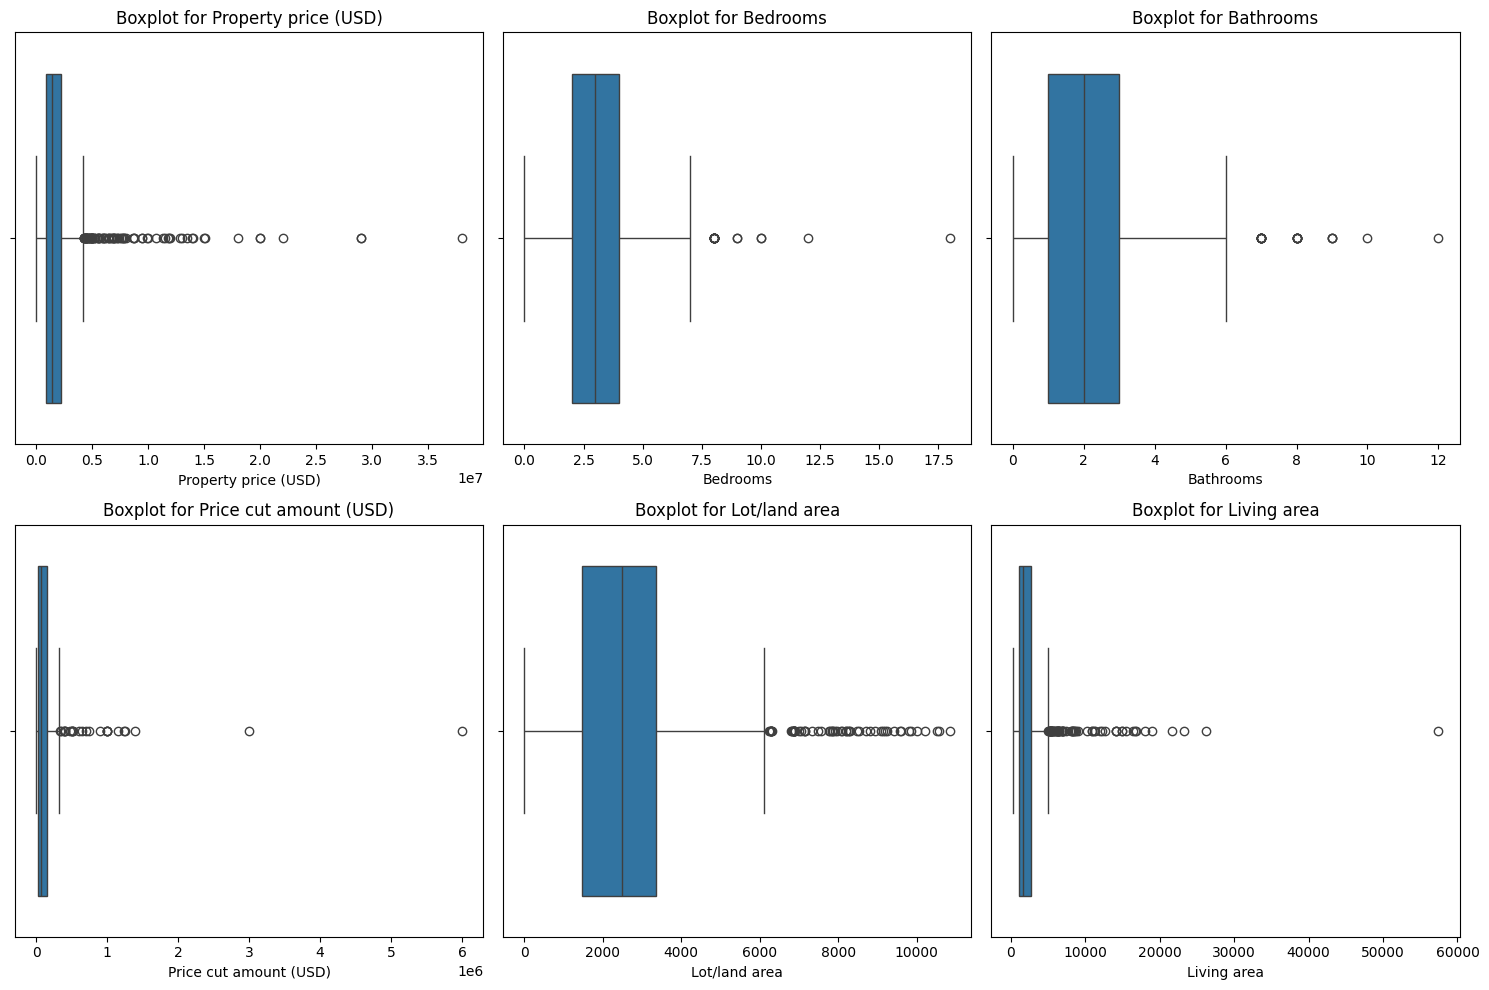

In [18]:
#check for outliers using box plots
#columns to check for outliers
columns_to_check = ['Property price (USD)', 'Bedrooms', 'Bathrooms', 'Price cut amount (USD)', 'Lot/land area', 'Living area']

#determine the number of rows and columns needed for subplots
n_cols = 3  # nmber of columns in the plot grid
n_rows = (len(columns_to_check) + n_cols - 1) // n_cols  #calculate the number of rows needed

#plotting boxplots for each column to identify outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(n_rows, n_cols, i)  #dynamically create subplots based on the number of columns
    sns.boxplot(x=sf_housing_data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


These box plots indicate: 
-There are significant outliers at the higher end of the price range, especially for very expensive properties. 
-Some properties have unusually large land areas, which could be outliers. 
-Extreme values exist, especially for properties with high prices and fewer bedrooms. 
-There are outliers with extremely high price per square foot. 


# 4.Prepare the Data


Apply any data transformations and explain what and why


In [19]:
#changes all the Lot/land area unit acres values to become sqrt for the sf_housing_data frame
sf_housing_data.loc[sf_housing_data['Lot/land area unit'] == 'acres', 'Lot/land area'] *= 43560

sf_housing_data.loc[sf_housing_data['Lot/land area unit'] == 'acres', 'Lot/land area unit'] = 'sqft'

#displays the new changes made to the sf_housing_data frame for the Lot/land area unit 
sf_housing_data["Lot/land area unit"].value_counts()


Lot/land area unit
sqft    845
Name: count, dtype: int64

In the above, I changed all the Lot/land area unit acres values to become sqft so that all the units match each other so that the computer can easily work with the same units.  

In [20]:
#keep only the relevant columns for the machine learning model
relevant_columns = ['Bedrooms', 'Bathrooms', 'Property price (USD)', 'Price cut amount (USD)', 
                    'Lot/land area',  'Property type', 'Living area']

#drop the rest of the columns
sf_housing_data_model = sf_housing_data[relevant_columns]

#display the remaining columns for verification
sf_housing_data_model.head()


,Bedrooms,Bathrooms,Property price (USD),Price cut amount (USD),Lot/land area,Property type,Living area
0,3.0,2.0,788000,NaN,2003.76,Single Family,2183.0
1,3.0,3.0,998000,NaN,1999.00,Single Family,1350.0
2,3.0,2.0,1095000,NaN,3001.28,Single Family,NaN
3,6.0,8.0,20000000,NaN,16988.40,Single Family,10961.0
4,2.0,1.0,899900,NaN,2591.82,Single Family,1016.0


In the above, I dropped all the columns that I didn't want anymore because the columns were not necessary for the project or didn't provide useful information for predicting the price. 

In [21]:
#filling missing values for numerical columns with the median
sf_housing_data_model.loc[:, 'Lot/land area'] = sf_housing_data_model['Lot/land area'].fillna(sf_housing_data_model['Lot/land area'].median())
sf_housing_data_model.loc[:, 'Bedrooms'] = sf_housing_data_model['Bedrooms'].fillna(sf_housing_data_model['Bedrooms'].median())
sf_housing_data_model.loc[:, 'Bathrooms'] = sf_housing_data_model['Bathrooms'].fillna(sf_housing_data_model['Bathrooms'].median())
sf_housing_data_model.loc[:, 'Living area'] = sf_housing_data_model['Living area'].fillna(sf_housing_data_model['Living area'].median())

#instead of filling in the missing values for Price cut amount (USD) with median, I just filled in 0. 
sf_housing_data_model.loc[:, 'Price cut amount (USD)'] = sf_housing_data_model['Price cut amount (USD)'].fillna(0)

#double check that there are no more missing values
sf_housing_data_model.isnull().sum()


Bedrooms                  0
Bathrooms                 0
Property price (USD)      0
Price cut amount (USD)    0
Lot/land area             0
Property type             0
Living area               0
dtype: int64

In the above, I filled in all the missing data. I used the median of the column to fill in the missing data. I needed to get rid of the missing data because otherwise the algorithm may produce inaccurate result and make the final analysis less reliable. Filling missing values maintains consistency in the dataset, ensuring more accurate results. 

In [32]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

#select the numerical columns to scale
numerical_columns = ['Bedrooms', 'Bathrooms', 'Property price (USD)', 
                     'Price cut amount (USD)', 'Lot/land area', 'Living area']

#ensure numerical columns are of float type 
sf_housing_data_model.loc[:, numerical_columns] = sf_housing_data_model.loc[:, numerical_columns].astype(float)

#initialize the scaler
scaler = StandardScaler()

#scale the numerical columns 
sf_housing_data_model.loc[:, numerical_columns] = scaler.fit_transform(sf_housing_data_model.loc[:, numerical_columns])

#initialize the OrdinalEncoder for categorical encoding
encoder = OrdinalEncoder()

#encode the Property type column 
sf_housing_data_model.loc[:, 'Property type'] = encoder.fit_transform(sf_housing_data_model[['Property type']]).astype(float)

#display the scaled and encoded data for verification
sf_housing_data_model.head()


,Bedrooms,Bathrooms,Property price (USD),Price cut amount (USD),Lot/land area,Property type,Living area
0,-0.833719,NaN,NaN,NaN,NaN,3.0,NaN
1,-0.833719,-0.828106,NaN,NaN,NaN,3.0,NaN
2,-0.833719,NaN,NaN,NaN,NaN,3.0,NaN
3,1.572892,2.509827,2.848695,NaN,-0.788363,3.0,1.696921
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN


I applied Standardization to ensure that each feature contributes equally to the model's training process. If the columns were left on their original scales, Property Price, for example, could dominate and make the model biased towards those features. I encoded Property type into numerical values in order to make the data compatible with the algorithms, allowing the model to understand and learn from the differences between property types. 

In [23]:
import numpy as np

#log transformation function to better handle outliers
def apply_log_transformation(df, col):
    #replace negative values with NaN to avoid invalid log computations
    df.loc[df[col] <= 0, col] = np.nan
    #apply log1p transformation
    df.loc[:, col] = np.log1p(df[col])

#columns to apply log transformation
columns_to_transform = ['Property price (USD)', 'Bedrooms', 'Bathrooms', 
                        'Lot/land area', 'Living area', 'Price cut amount (USD)']

#apply the log transformation function to each column
for col in columns_to_transform:
    apply_log_transformation(sf_housing_data_model, col)

#display the transformed data
sf_housing_data_model.head()


,Bedrooms,Bathrooms,Property price (USD),Price cut amount (USD),Lot/land area,Property type,Living area
0,0.020424,NaN,NaN,NaN,NaN,3.0,NaN
1,0.020424,0.319915,NaN,NaN,NaN,3.0,NaN
2,0.020424,NaN,NaN,NaN,NaN,3.0,NaN
3,1.035971,1.513051,1.954172,NaN,0.161957,3.0,1.297918
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In the above, I used the logarithmic transformation to reduce the effect of outliers. I did this in order to normalize the distribution and make the model less sensitive to extreme values, improving the model performance. 

In [24]:
import pandas as pd
import numpy as np
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer


#change all Lot/land area unit acres values to sqft
sf_housing_data.loc[sf_housing_data['Lot/land area unit'] == 'acres', 'Lot/land area'] *= 43560
sf_housing_data.loc[sf_housing_data['Lot/land area unit'] == 'acres', 'Lot/land area unit'] = 'sqft'

#function for log transformation with non-negative check
def log_transform(X):
    X = np.where(np.isnan(X), 0, X)  
    X = np.where(X < 0, 0, X)  
    return np.log1p(X)

#numerical columns (excluding Property price (USD) since it's the target)
numerical_columns = ['Bedrooms', 'Bathrooms', 
                     'Lot/land area', 'Living area']

#special case for Price cut amount (USD)
price_cut_column = ['Price cut amount (USD)']

#categorical columns
categorical_columns = ['Property type']

#pipeline for numerical columns: imputation (median), scaling, and log transformation
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),  #standard scaling
    ('log_transform', FunctionTransformer(log_transform))  #log transformation
])

#pipeline for Price cut amount (USD) to fill missing values with 0
price_cut_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #fill missing values with 0
    ('scaler', StandardScaler()),  # Standard scaling
    ('log_transform', FunctionTransformer(log_transform))  #log transformation
])

#pipeline for categorical columns with handling unseen categories
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  #handle missing categories
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  #handle unknown categories
])

#combining numerical, price cut amount, and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('price_cut', price_cut_pipeline, price_cut_column),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

#creating the pipeline
sf_housing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#separate target before transformation
target_column = 'Property price (USD)' 
y = sf_housing_data[target_column]  #target variable 
sf_housing_data_features = sf_housing_data.drop(columns=[target_column])  #features without the target

#fit the pipeline to the features only
sf_housing_pipeline.fit(sf_housing_data_features)

#save the pipeline to a file
joblib.dump(sf_housing_pipeline, "SFHousingPipeline.pkl")

#transform the features
sf_housing_data_transformed = sf_housing_pipeline.transform(sf_housing_data_features)

#convert transformed features to DataFrame for easier manipulation
numerical_output_columns = numerical_columns + ['Price cut amount (USD)']
categorical_output_columns = ['Property type']
output_columns = numerical_output_columns + categorical_output_columns

sf_housing_data_transformed = pd.DataFrame(sf_housing_data_transformed, 
                                           columns=output_columns)

#display the transformed data
print(sf_housing_data_transformed.head())

   Bedrooms  Bathrooms  Lot/land area  Living area  Price cut amount (USD)  \
0  0.020424   0.000000       0.000000     0.000000                     0.0   
1  0.020424   0.319915       0.000000     0.000000                     0.0   
2  0.020424   0.000000       0.000000     0.000000                     0.0   
3  1.035971   1.513051       0.161957     1.297918                     0.0   
4  0.000000   0.000000       0.000000     0.000000                     0.0   

   Property type  
0            3.0  
1            3.0  
2            3.0  
3            3.0  
4            3.0  


In the above, I have my entire data pipeline. I wanted to try to process my data without using the pipeline at the beginning but I ultimately decided to use a pipeline.

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In the below, I will be testing various models to see which model performs the best on the test set. 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#use the transformed features (X) and the original target (y) for model training
X = sf_housing_data_transformed  
y = y  

#split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=50)

#train the model
rf_model.fit(X_train, y_train)

#predict on the test set
y_pred = rf_model.predict(X_test)

#calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

#calculate the accuracy score
accuracy = r2_score(y_test, y_pred)

print(f"RMSE Test: {rmse}")
print(f"Accuracy Score Test: {accuracy:.4f}")


print(rf_model.get_params())

RMSE Test: 960956.4901132082
Accuracy Score Test: 0.8306
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 50, 'verbose': 0, 'warm_start': False}


In the above:
1: First, I split the data into the train set and test set. 
2: Next, I used the fit method to train the train set. 
3: Then, I used the predict method on the test set. 
4: Lastly, I used the rmse and accuracy score to display my results. 

Results: 
I see that the rmse is very high which is not good. My accuracy score is 83% which pretty good. I will try other models to see if I can improve my rmse score. 


In [26]:
import joblib
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#initialize and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=39)
gbr_model.fit(X_train, y_train)

#make predictions and evaluate the model
y_gbr_pred = gbr_model.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_gbr_pred))
accuracy_gbr = r2_score(y_test, y_gbr_pred)


#save the trained Gradient Boosting Regressor model
joblib.dump(gbr_model, "SFHousingModel.pkl")  # Save gbr_model instead of rf_model

#output the evaluation metrics
print(f"RMSE with Gradient Boosting: {rmse_gbr}")
print(f"Accuracy with Gradient Boosting: {accuracy_gbr:.4f}")



RMSE with Gradient Boosting: 1189887.1596625089
Accuracy with Gradient Boosting: 0.7402


In the above I used Gradient Boosting Regressor. I performed the same steps to train and predict the values as I did with Random Forest Regressor. 

Results: 
I can see that the rmse is higher which isn't good. I can also see the accuracy score is around 74% which is worse than Random Forest Regressor. 

In [27]:
from sklearn.neighbors import KNeighborsRegressor

#initialize and train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train, y_train)

#make predictions and evaluate
y_knn_pred = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_knn_pred))
accuracy_knn = r2_score(y_test, y_knn_pred)

print(f"RMSE with KNN Regressor: {rmse_knn}")
print(f"Accuracy with KNN Regressor: {accuracy_knn:.4f}")


RMSE with KNN Regressor: 1848719.2001042468
Accuracy with KNN Regressor: 0.3729


In the above I used KNN Regressor. I performed the same steps to train and predict the values as I did with Random Forest Regressor and Gradient Boosting Regressor.

Results: I can see that the rmse and the accuracy score for KNN is worse than Random Forest Regressor or Gradient Boost Regressor. This indicates that choosing an appropriate model is very important. 

I've decided that the model that I will continue with is Random Forest Regressor. 

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best results possiable 


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


#define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000],  
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [10, 20, 30, 50, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]
}

#initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_grid,
                                   n_iter=100,  
                                   cv=3,  
                                   verbose=1,  
                                   random_state=50,
                                   n_jobs=-1)  

#fit the random search model
random_search.fit(X_train, y_train)

#get the best parameters from the random search
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

#get the cross-validation score
best_cv_score = random_search.best_score_
print(f"Best cross-validation score: {best_cv_score:.4f}")

#evaluate the best estimator on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

#calculate RMSE and accuracy score for the tuned model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = r2_score(y_test, y_pred)

print(f"RMSE Test (after tuning): {rmse}")
print(f"Accuracy Score Test (after tuning): {accuracy:.4f}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'bootstrap': True}
Best cross-validation score: 0.5986
RMSE Test (after tuning): 1057277.963304964
Accuracy Score Test (after tuning): 0.7949


After 100 iterations, these were the results:

Best parameters found: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'bootstrap': True}
Best cross-validation score: 0.5986
RMSE Test (after tuning): 1057277.963304964
Accuracy Score Test (after tuning): 0.7949
Selection deleted

In the above I can see that the cross validation score is 59.86% is capturing more than half of the variability but leaves a good portion unexplained. I can also see that the RMSE is very high which is not good. And lastly, I can see that the model is performing decent on unseen data given the accuracy score of nearly 80%. The accuracy score is better than the cross validation score indicating that the model is performing better than expected on new data. I can also tell that since my accuracy score on the test set is higher than the cross-validation, this generally suggests that my model is not overfitting. It is also unlikely that my model is underfitting because signs of underfitting include low scores in both cross validation and on the test set which isn't the case. It's likely that my model is well fitted and able to capture some meaningful patterns. 

After 1,000 iterations, these were the results: 

Best parameters found: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best cross-validation score: 0.6003
RMSE Test (after tuning): 1061051.493351121
Accuracy Score Test (after tuning): 0.7934

After 1,000 iterations, I can see that the RMSE and Accuracy are not getting better. The rmse and accuracy score both got a tiny bit worse. But, I can again see that my data is unlikely overfitting or underfitting. 

After 10,000 iterations, these were the results:

Best parameters found: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best cross-validation score: 0.6559
RMSE Test (after tuning): 1133175.4391650788
Accuracy Score Test (after tuning): 0.7644

After 10,000 iterations, I can see that the RMSE and the accuracy scores are getting worse compared to the results in for 1,000 iterations. I think this is because after a certain number of iterations, I have already found a good set of hyperparameters for the model, and additional iterations are producing combinations that are not necessarily better. I think this is possibly because improvements after a certain point start to plateau slightly due to over exploration of the parameter space. 

After 100 iterations with different parameters: 
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 100, 'max_depth': 130, 'bootstrap': True}
Best cross-validation score: 0.6016
RMSE Test (after tuning): 1045289.5632177411
Accuracy Score Test (after tuning): 0.7995

It's still not performing better than the original model. 

Best parameters found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1, 'max_depth': 130, 'bootstrap': False}
Best cross-validation score: 0.5824
RMSE Test (after tuning): 1196963.526240467
Accuracy Score Test (after tuning): 0.7371

Here I adjusted some of the parameter ranges but it's still not performing better than the original model. 

Best parameters found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 100, 'max_depth': 100, 'bootstrap': True}
Best cross-validation score: 0.6033
RMSE Test (after tuning): 1050115.8863195116
Accuracy Score Test (after tuning): 0.7977

Here I adjusted the parameter ranges again but it's still not performing better than the original model. 

Best parameters found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 100, 'max_depth': 100, 'bootstrap': True}
Best cross-validation score: 0.5930
RMSE Test (after tuning): 1214841.669358029
Accuracy Score Test (after tuning): 0.7292

Here I adjusted the parameter ranges again but it's still not performing better than the original model. 



In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': ['sqrt', 'log2', None],  
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]
}

#initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=0)

#fit the grid search to the training data
grid_search.fit(X_train, y_train)

#get the best parameters and best score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

#re-train the model using the best parameters
best_rf_model = grid_search.best_estimator_
y_best_rf_pred = best_rf_model.predict(X_test)

#evaluate the model on the test data
best_rmse_test = np.sqrt(mean_squared_error(y_test, y_best_rf_pred))
best_accuracy_test = r2_score(y_test, y_best_rf_pred)

#output the best parameters and the evaluation results
print("Best Parameters from Grid Search:", best_params)
print(f"Best RMSE from cross-validation: {best_rmse:.4f}")
print(f"RMSE on Test Data: {best_rmse_test:.4f}")
print(f"Accuracy on Test Data: {best_accuracy_test:.4f}")


Best Parameters from Grid Search: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE from cross-validation: 1837095.1535
RMSE on Test Data: 1140800.9343
Accuracy on Test Data: 0.7612


Best Parameters from Grid Search: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best RMSE from cross-validation: 1837095.1535

RMSE on Test Data: 1140800.9343

Accuracy on Test Data: 0.7612

In the above, I can see that grid search didn't improve the performance of my model. For me, I think randomized search helps more than grid search. 

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


After looking on Zillow to get my data for San Francisco, I ended up with 871 different houses.

I explored the data and looked for patterns and correlations using scatter plots, histograms, correlations matrices, and box plots in order to determine how certain attributes were related, identify biases, and identify possible outliers. 

-A potential bias that I noticed was that the dataset was composed primarily of Condominium properties and Single Family Homes rather than Townhomes which suggested a potential bias in the dataset toward these properties. 
-I also noticed there was a strong positive correlation with Property price and Price cut amount and Property price with Bedrooms/Bathrooms. And some correlation of Property price with Lot/land area and Property price with Living area. 
-There were also some outliers in the data for properties with high prices but fewer bedrooms. 

Ultimately I decided to use these attributes: Living area, Bedrooms, Bathrooms, Property Type, and Price cut amount. 

Next, I applied some data transformations using a data pipeline: 
-Changed acres to sqrt
-Filled in missing data with the median (SimpleImputer) 
-Applied Standardization to ensure that each feature contributed equal to the training process (Standard Scalar)
-Applied Logarithmic transformation to reduce the effect of outliers

After filtering my data, I still had 871 different houses because I didn’t have any duplicates. 

Then I tested 3 different models: 
-Random Forest Regressor
-Gradient Boosting Regressor
-KNN Regressor

Random Forest Regressor performed the best out of all the models with an RMSE of  960956 and an accuracy score of 83% before hyperparameter tuning. 

Then, I tuned my model with Randomized Search over 100, 1,000, and 10,000 iterations abd tried various parameter ranges but this process ended up not improving the R^2 or RMSE score. 

The final results are: 

-Root Mean Square Error: 960956

-Accuracy Score: 83%

Overall, these results are not that good. 

Several factors contributing to poor results:

- My data quantity may have been insufficient for accurate predictions. With more data, I could have improved performance, accuracy, or RMSE.

- The model predicted frequent or central values well but made large errors on outliers, heavily impacting RMSE. Instead of applying log transformations, I could have manually removed extreme outliers.

- A different imputer value for the Lot/land area column might have been more effective, as the median didn’t provide valuable results.

- My dataset from Zillow (via the Zillow Data Exporter extension) lacked useful attributes like A/C, heating, pools, and number of floors, limiting model performance.

- A possible reason for such as large rmse is because the majority of the houses in my San Fransisco data where 1-2 million dollars that were primarily Single Family/Condominium houses but there were a few instances of houses being 15-30 million dollars. The high priced houses may have disproportionately affected the rmse despite efforts to minimize this effect.

- Trying the MEA performance measure could have produced better results as MAE is less sensitive to outliers. 


In [30]:
#for numerical columns
print("Training set summary statistics:\n", X_train.describe())
print("Test set summary statistics:\n", X_test.describe())

#for the target variable
print("Training set target summary:\n", y_train.describe())
print("Test set target summary:\n", y_test.describe())


Training set summary statistics:
          Bedrooms   Bathrooms  Lot/land area  Living area  \
count  696.000000  696.000000     696.000000   696.000000   
mean     0.209862    0.232627       0.083650     0.127484   
std      0.369241    0.373928       0.279593     0.331617   
min      0.000000    0.000000       0.000000     0.000000   
25%      0.000000    0.000000       0.000000     0.000000   
50%      0.020424    0.000000       0.000000     0.000000   
75%      0.482243    0.319915       0.000000     0.026020   
max      2.303252    1.956059       2.952526     2.899930   

       Price cut amount (USD)  Property type  
count              696.000000     696.000000  
mean                 0.059743       1.356322  
std                  0.252170       1.394559  
min                  0.000000       0.000000  
25%                  0.000000       0.000000  
50%                  0.000000       1.000000  
75%                  0.000000       3.000000  
max                  3.163466       5.00

The mean and standard deviation for bedrooms, bathrooms, lot/land area, and property type are very close between the training and test sets. Additionally, the target variable (Property price) shows reasonably similar mean and standard deviation values across both sets. This suggests that the distributions of these features are similar, and the test set is largely representative of the training set which may have been a reason for my decent accuracy score. 

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [1]:
import warnings
import pandas as pd
import numpy as np
import joblib


warnings.filterwarnings("ignore", category=UserWarning)

def log_transform(X):
    X = np.where(np.isnan(X), 0, X) 
    X = np.where(X < 0, 0, X) 
    return np.log1p(X)


def inference(params):
    #define the input data structure with the required features
    df = {
        "Bedrooms": [params[0]],
        "Bathrooms": [params[1]],
        "Lot/land area": [params[2]],
        "Living area": [params[3]],
        "Price cut amount (USD)": [params[4]],
        "Property type": [params[5]],
    }
    
    #create a DataFrame from the input parameters
    input_data = pd.DataFrame(data=df)
    
    #load the pre-trained model and preprocessing pipeline
    pipeline = joblib.load("SFHousingPipeline.pkl")
    model = joblib.load("SFHousingModel.pkl")
    
    #apply the preprocessing pipeline to the input data
    preprocessed_data = pipeline.transform(input_data)
    
    #perform the prediction using the loaded model
    results = model.predict(preprocessed_data)[0]

    return results

#example:
predicted_price = inference([2, 2, 4000, 2000, 3000.0, "Single Family"])
print(f"Predicted Property Price: ${predicted_price:.2f}")


Predicted Property Price: $1069167.62
